# Проект: классификация

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
import seaborn as sns
import plotly.express as px
import kaleido
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing  import LabelEncoder, OneHotEncoder
from sklearn import preprocessing
from sklearn import linear_model 
from sklearn import tree 
from  sklearn.ensemble import IsolationForest, RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn import metrics 
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.feature_selection import SelectKBest, f_classif
import optuna

C:\Users\maxim\AppData\Local\Temp\ipykernel_27540\2607058593.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [2]:
# PX_MODE = None
PX_MODE = 'svg'

## Часть 1. Знакомство с данными, обработка пропусков и выбросов

<div class="grey-container">
<p><strong>Данные о клиентах банка:</strong></p>
<ul style="list-style-type: square;">
<ul style="list-style-type: square;">
<li><span class="code-blue">age</span> (возраст);</li>
<li><span class="code-blue">job</span> (сфера занятости);</li>
<li><span class="code-blue">marital</span> (семейное положение);</li>
<li><span class="code-blue">education</span> (уровень образования);</li>
<li><span class="code-blue">default</span> (имеется ли просроченный кредит);</li>
<li><span class="code-blue">housing</span> (имеется ли кредит на жильё);</li>
<li><span class="code-blue">loan</span> (имеется ли кредит на личные нужды);</li>
<li><span class="code-blue">balance</span> (баланс).</li>
</ul>
</ul>
<p></p>
<p><strong>Данные, связанные с последним контактом в контексте текущей маркетинговой кампании:</strong></p>
<ul style="list-style-type: square;">
<ul style="list-style-type: square;">
<li><span class="code-blue">contact</span> (тип контакта с клиентом);</li>
<li><span class="code-blue">month</span> (месяц, в котором был последний контакт);</li>
<li><span class="code-blue">day</span> (день, в который был последний контакт);</li>
<li><span class="code-blue">duration</span> (продолжительность контакта в секундах).</li>
</ul>
</ul>
<p></p>
<p><strong>Прочие признаки:</strong></p>
<ul style="list-style-type: square;">
<ul style="list-style-type: square;">
<li><span class="code-blue">campaign</span> (количество контактов с этим клиентом в течение текущей кампании);</li>
<li><span class="code-blue">pdays</span> (количество пропущенных дней с момента последней маркетинговой кампании до контакта в&nbsp;текущей кампании);</li>
<li><span class="code-blue">previous</span> (количество контактов до текущей кампании)</li>
<li><span class="code-blue">poutcome</span> (результат прошлой маркетинговой кампании).</li>
</ul>
</ul>
<p></p>
<p>И, разумеется, наша <strong>целевая переменная</strong> <span class="code-blue">deposit</span>, которая определяет, согласится ли клиент открыть депозит в банке. Именно её мы будем пытаться предсказать в данном кейсе.</p>
</div>

### Задание 1

In [3]:
df = pd.read_csv('data/bank_fin.csv', sep = ';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,"2 343,00 $",yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,"45,00 $",no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,"1 270,00 $",yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,"2 476,00 $",yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,"184,00 $",no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11137 non-null  object
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(6), object(11)
memory usage: 1.4+ MB


In [5]:
# исследуйте данные на предмет пропусков. Где есть пропущенные значения? Сколько их?
# ваш код
nan_cols = df.isna().sum()
nan_cols = nan_cols[nan_cols>0]
nan_cols

balance    25
dtype: int64

### Задание 2

In [6]:
# есть ли в признаке job пропущенные значения? Возможно, они обозначены каким-то специальным словом?
# ваш код
df['job'].value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

### Задание 3

In [7]:
def balance_transformer(x):
    symbols_to_remove = [' ', '$',]
    for sym in symbols_to_remove:
        if sym in x:
            x = x.replace(sym, '')
    x = x.replace(',','.') if ',' in x else x
    return x

In [8]:
# преобразуйте признак balance таким образом, чтобы он корректно считывался, как вещественное число (float)
mask = ~df.balance.isna()
df.loc[mask,'balance'] = df[mask].balance.apply(balance_transformer).astype(float)
df.balance.value_counts()
# df.balance.isna().sum()

 0.0       774
 1.0        39
 3.0        34
 2.0        34
 4.0        29
          ... 
 1641.0      1
 5517.0      1
 8332.0      1
 4859.0      1
-134.0       1
Name: balance, Length: 3802, dtype: int64

In [9]:
print(f'среднее значение признака "balance" {np.round(df.balance.mean(), 3)}')

среднее значение признака "balance" 1529.129


### Задание 4

In [10]:
# обработайте пропуски в признаки balance , заменив их на медианные значения по данному признаку
# ваш код

df.balance.fillna(df.balance.median(), inplace=True)
print(f'Количество пропусков в признаке "balance" {df.balance.isna().sum()}')
print(f'среднее значение признака "balance" {np.round(df.balance.mean(), 3)}')

Количество пропусков в признаке "balance" 0
среднее значение признака "balance" 1526.936


### Задание 5

In [11]:
# обработайте пропуски в категориальных признаках: job и education, заменив их на модальные значения
# ваш код
feature_list = ['job', 'education']
nan_word = 'unknown'
for feature in feature_list:
    moda = df[feature].mode()[0]
    df.loc[df[feature] == nan_word, feature] = moda


После замены пропусков рассчитайте средний баланс для клиентов с самой популярной работой и самым популярным уровнем образования (т. е. для тех, у кого одновременно самая популярная работа и самое популярное образование). Ответ округлите до трёх знаков после точки-разделителя.

In [12]:
mask1 = df.job == df.job.mode()[0]
mask2 = df.education == df.education.mode()[0]
print(f'Средний баланс для клиентов с самой популярной работой и самым популярным \
уровнем образования {np.round(df[mask1 & mask2].balance.mean(),3)}')

Средний баланс для клиентов с самой популярной работой и самым популярным уровнем образования 1598.883


### Задание 6

Размер до очистки: (11162, 17)


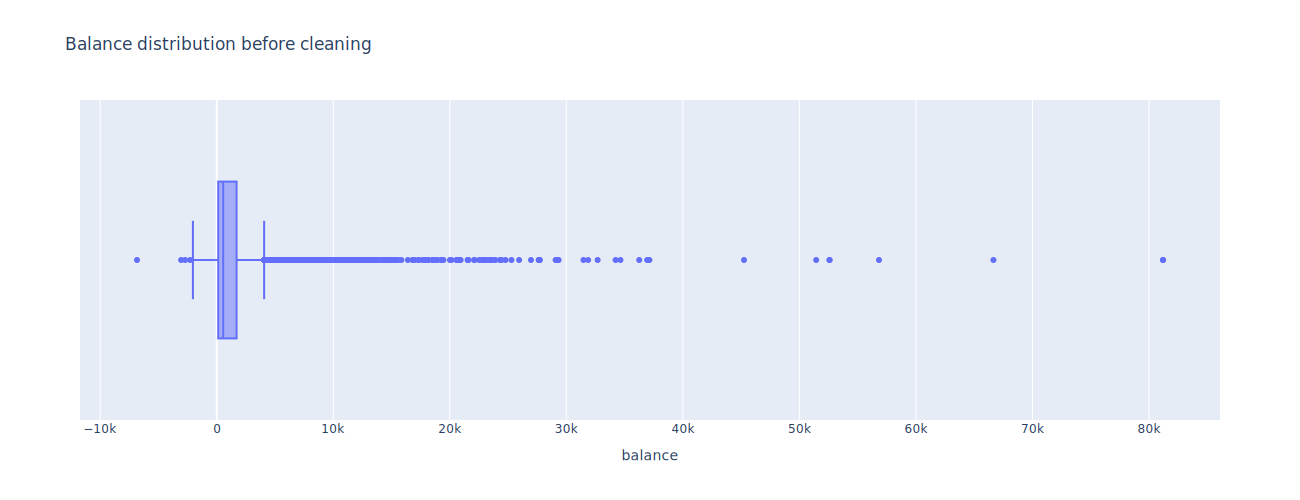

1ая и 3ья квартиль (123.0, 1699.0)
Межквартильный размах 1576.0
Границы по заданным параметрам: (-2241.0, 4063.0)
Размер после очистки: (10105, 17)


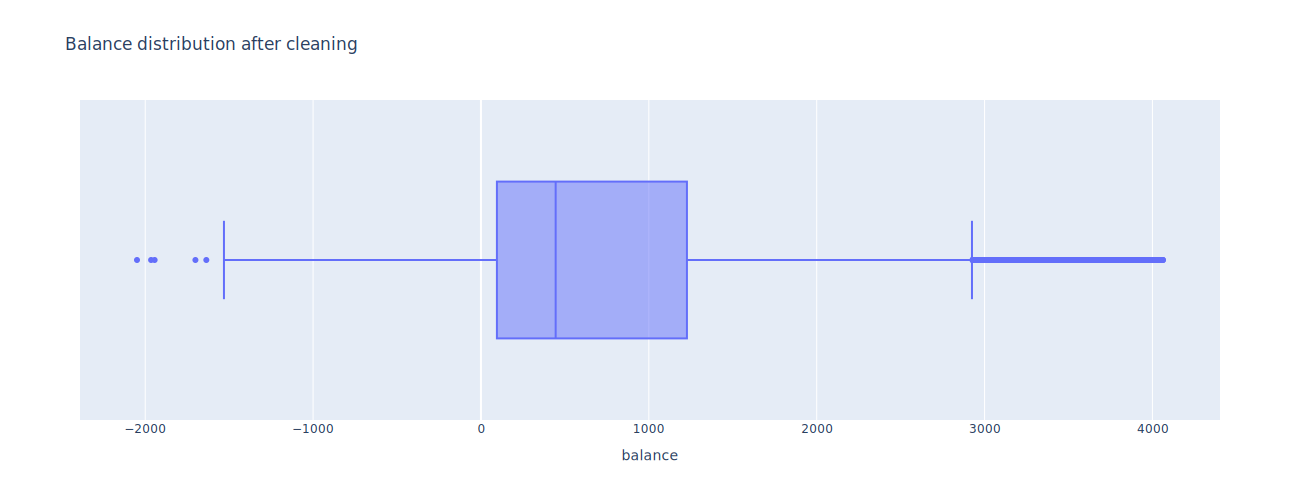

In [13]:
# удалите все выбросы для признака balance
# ваш код

def outliers_iqr_mod(data, feature, log_scale = False, left = 1.5, right=1.5):
    if log_scale:
        x = np.log(data[feature])
    else:
        x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75)
    print(f'1ая и 3ья квартиль {quartile_1,quartile_3}')
    iqr = quartile_3 - quartile_1
    print(f'Межквартильный размах {iqr}')
    lower_bound = quartile_1 - left*iqr
    upper_bound = quartile_3 + right*iqr
    print(f'Границы по заданным параметрам: {lower_bound, upper_bound}')
    outliers = data[(x<lower_bound) | (x>upper_bound)]
    cleaned = data[(x>=lower_bound) & (x<=upper_bound)]    
    return outliers, cleaned


print(f'Размер до очистки: {df.shape}')
fig = px.box(df, x='balance', title='Balance distribution before cleaning ', width= 1300)
fig.show(PX_MODE)

outliers, cleaned = outliers_iqr_mod(df, 'balance')

print(f'Размер после очистки: {cleaned.shape}')
fig = px.box(cleaned, x='balance', title='Balance distribution after cleaning ', width= 1300)
fig.show(PX_MODE)




In [14]:
df = cleaned

## Часть 2:  Разведывательный анализ

### Задание 1

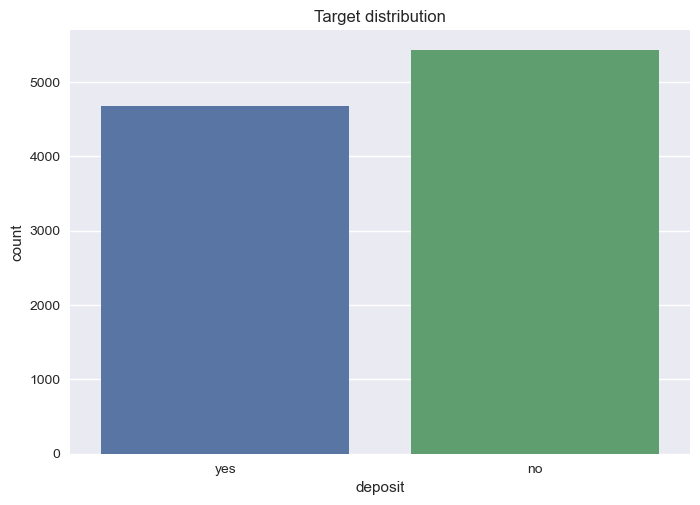

In [15]:
# изучите соотношение классов в ваших данных на предмет несбалансированности, проиллюстрируйте результат
# ваш код
ax = sns.countplot(data=df, x='deposit')
ax.set_title('Target distribution');

In [16]:
df.deposit.value_counts()

no     5424
yes    4681
Name: deposit, dtype: int64

### Задания 2 и 3

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10105 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        10105 non-null  int64  
 1   job        10105 non-null  object 
 2   marital    10105 non-null  object 
 3   education  10105 non-null  object 
 4   default    10105 non-null  object 
 5   balance    10105 non-null  float64
 6   housing    10105 non-null  object 
 7   loan       10105 non-null  object 
 8   contact    10105 non-null  object 
 9   day        10105 non-null  int64  
 10  month      10105 non-null  object 
 11  duration   10105 non-null  int64  
 12  campaign   10105 non-null  int64  
 13  pdays      10105 non-null  int64  
 14  previous   10105 non-null  int64  
 15  poutcome   10105 non-null  object 
 16  deposit    10105 non-null  object 
dtypes: float64(1), int64(6), object(10)
memory usage: 1.4+ MB


In [18]:
quantitative_features = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']


In [19]:
#рассчитайте описательные статистики для количественных переменных, проинтерпретируйте результат
#ваш код
df[quantitative_features].describe()

,age,balance,duration,campaign,pdays,previous
count,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000
mean,40.895497,807.653538,368.742603,2.517170,51.319644,0.816230
std,11.734931,994.151966,346.651524,2.707159,109.644179,2.243795
min,18.000000,-2049.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,95.000000,137.000000,1.000000,-1.000000,0.000000
50%,38.000000,445.000000,252.000000,2.000000,-1.000000,0.000000
75%,48.000000,1227.000000,490.000000,3.000000,2.000000,1.000000
max,95.000000,4063.000000,3881.000000,43.000000,854.000000,58.000000


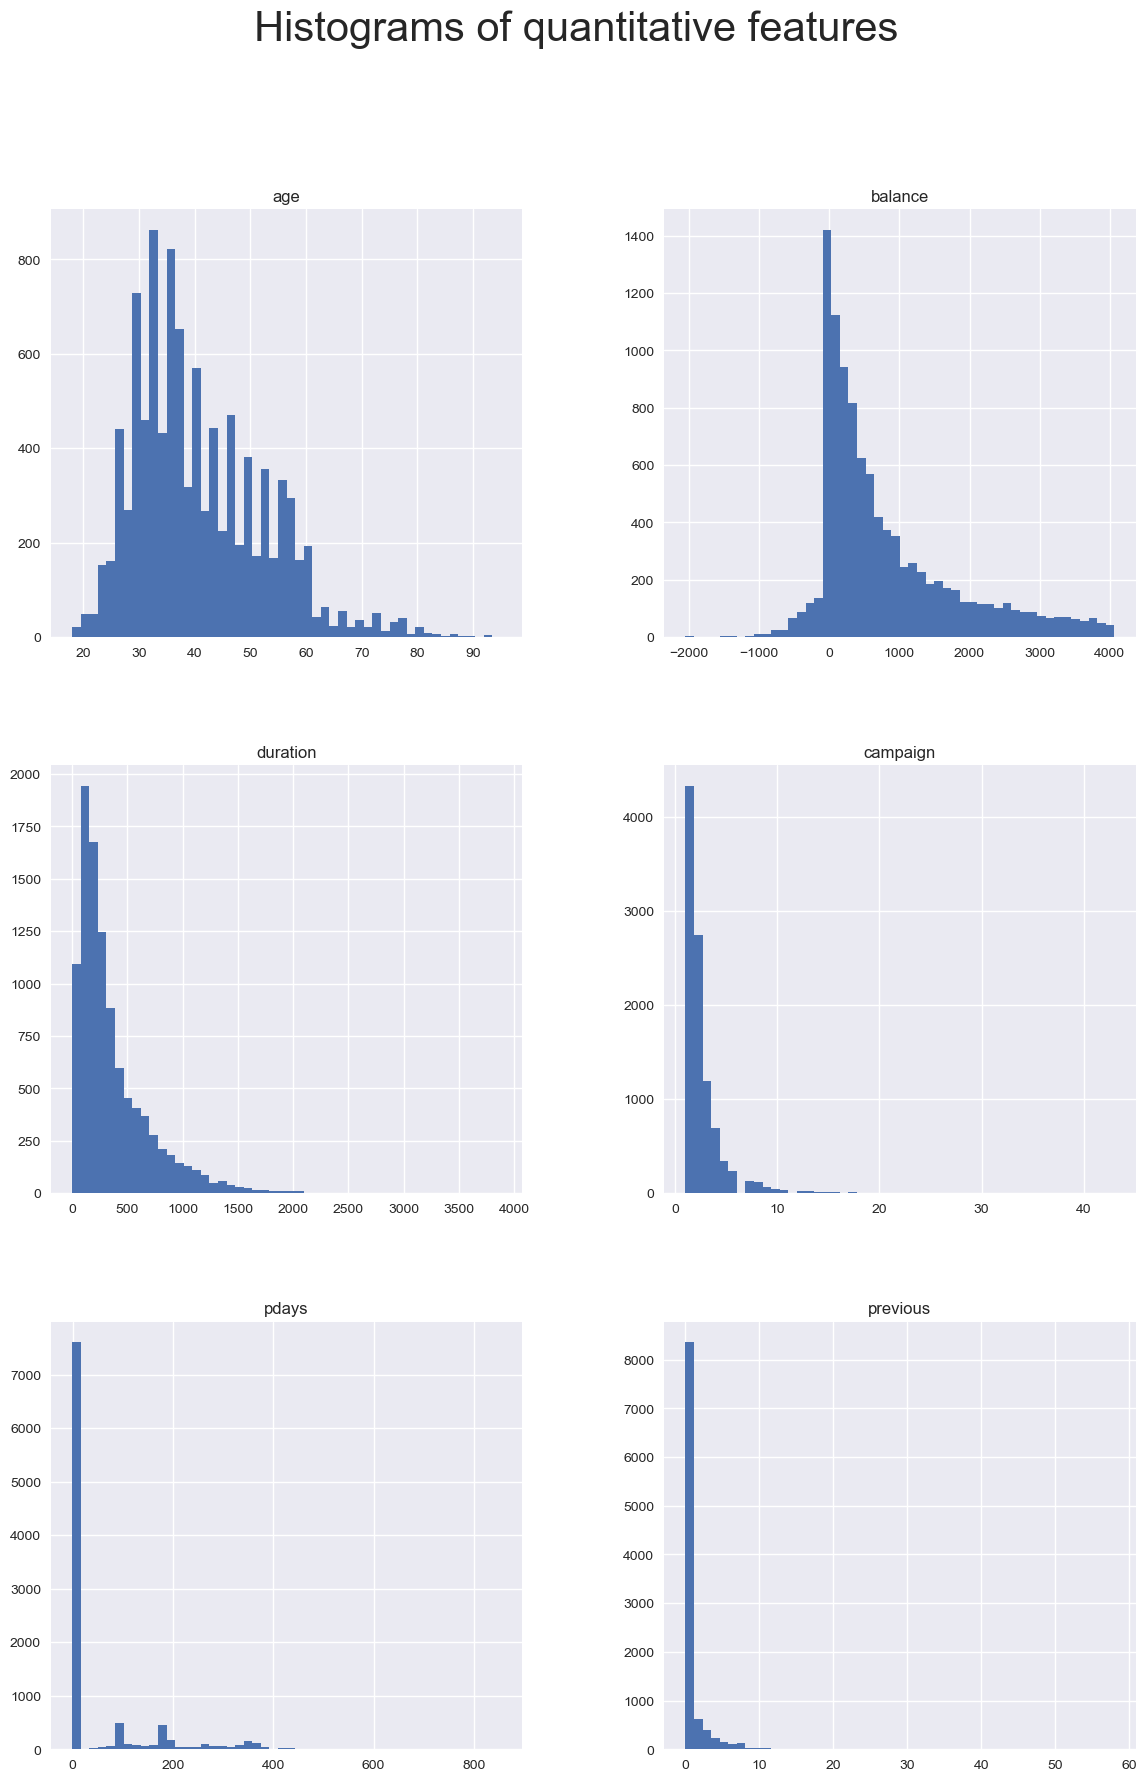

In [20]:
fig, axes = plt.subplots(3,2, figsize=(14,20))
ax = df[quantitative_features].hist(ax=axes, bins=50,)
fig.suptitle('Histograms of quantitative features', fontsize=30);

Числовы признакаи имеют в основном распределение похожее на логнормальное. Видим по распределениям и разнице между средним и медианам, что в признаках  'duration', 'campaign', 'pdays', 'previous' есть небольшое количество аномальных значений. Признак баланса может принимать отриуательные значения. В признаке "pdays" пропуски вероятно заменены на значение "-1" которое скорее всего значит, что ни разу с клиентом контакта еще не было.
Также по форме распределений, вопреки заданию, при поискики аномалий в балансе, я бы увеличил правую границу до $Q3 + [2..3]IQR$

### Взаимосвязь числовых признаков с таргетом

In [21]:
quantitative_features.append('deposit')
df['deposit'] = df['deposit'].apply(lambda x: 1 if x == 'yes' else 0)

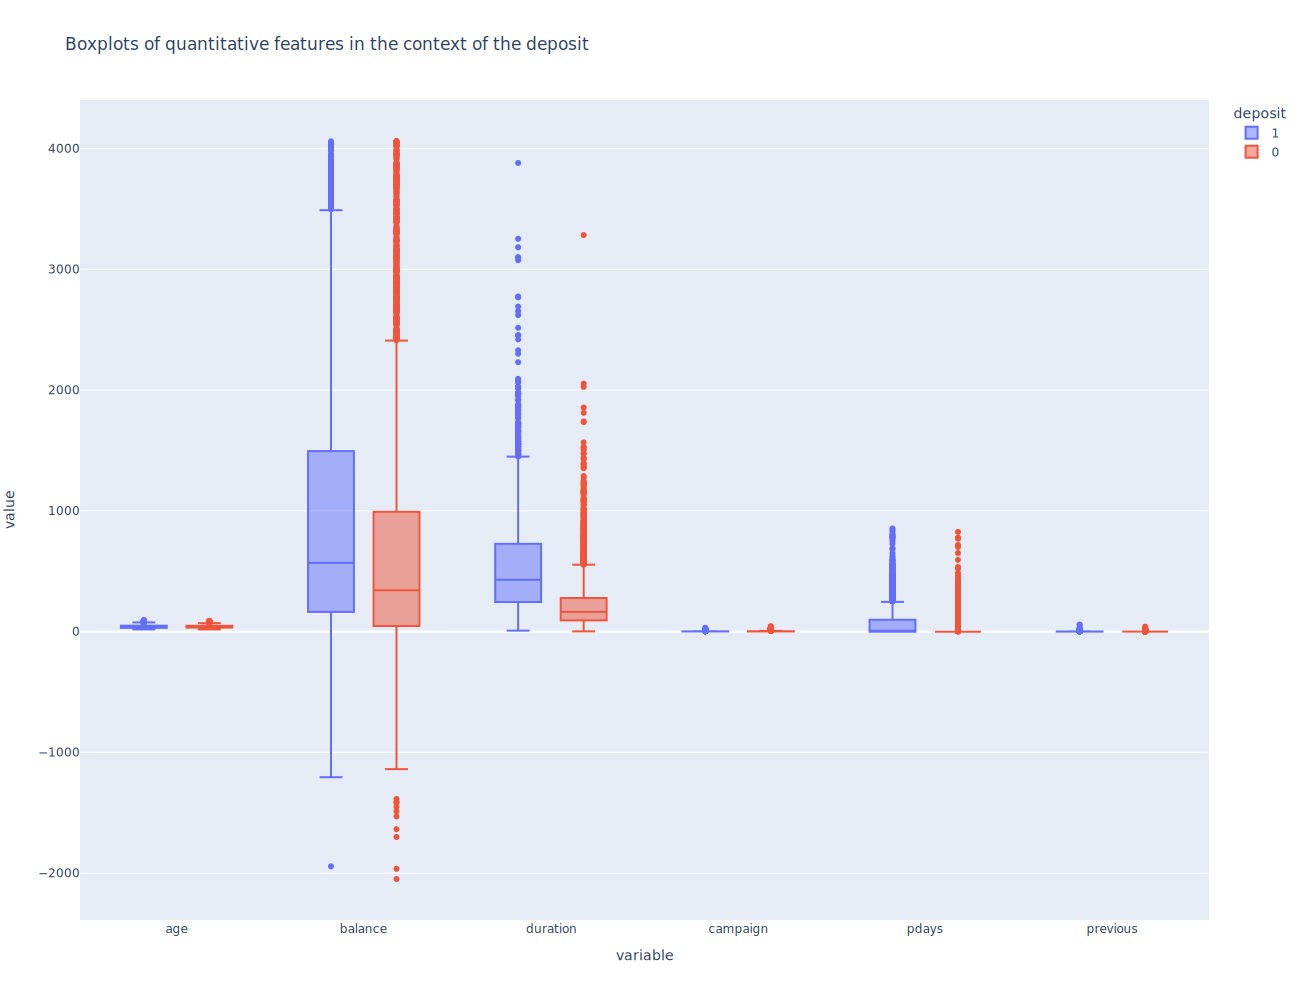

In [22]:
fig = px.box(data_frame=df[quantitative_features],
             title = 'Boxplots of quantitative features in the context of the deposit',
             color='deposit',
             width= 1300,
             height=1000 )
fig.show(PX_MODE)

По коробочным диаграммам в разрезе таргета уже можно видеть, что некоторые признаки, например duration и pdays имееют сильную взаимосвязь с таргетом, неоторые, например balance, чуть слабее, но все еще значимую, а вот возраст и campaign на первый взгляд на таргет практически не влияют:
- у людей кто принял предложение о открытие депозита на счету в среднем больше денег
- те, кто дольше общался при контакте с банком, те гораздо чаще открывали депозит
- а вот делать выводы о взаимосвязи таргета и 'pdays' рано при учете, что среди тех кто открыл депозит множество имееют значение -1 которое скорее всего значит, что ни разу с клиентом контакта еще не было.

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10105 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        10105 non-null  int64  
 1   job        10105 non-null  object 
 2   marital    10105 non-null  object 
 3   education  10105 non-null  object 
 4   default    10105 non-null  object 
 5   balance    10105 non-null  float64
 6   housing    10105 non-null  object 
 7   loan       10105 non-null  object 
 8   contact    10105 non-null  object 
 9   day        10105 non-null  int64  
 10  month      10105 non-null  object 
 11  duration   10105 non-null  int64  
 12  campaign   10105 non-null  int64  
 13  pdays      10105 non-null  int64  
 14  previous   10105 non-null  int64  
 15  poutcome   10105 non-null  object 
 16  deposit    10105 non-null  int64  
dtypes: float64(1), int64(7), object(9)
memory usage: 1.4+ MB


### Задания 4 и 5

In [24]:
#рассчитайте описательные статистики для категориальных переменных, проинтерпретируйте результат
cat_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'day', 'month', 'poutcome']
cat_features.remove('day')
display(df[cat_features].describe())
display(df.day.describe())
cat_features.append('day')

,job,marital,education,default,housing,loan,contact,month,poutcome
count,10105,10105,10105,10105,10105,10105,10105,10105,10105
unique,11,3,3,2,2,2,3,12,4
top,management,married,secondary,no,no,no,cellular,may,unknown
freq,2315,5715,5517,9939,5243,8712,7283,2617,7570


count    10105.000000
mean        15.590302
std          8.441510
min          1.000000
25%          8.000000
50%         15.000000
75%         22.000000
max         31.000000
Name: day, dtype: float64

In [25]:
for feature in cat_features:
    print(f'{feature:-^80}')
    display(df[feature].value_counts(normalize=True))

--------------------------------------job---------------------------------------


management       0.229095
blue-collar      0.178822
technician       0.162098
admin.           0.123305
services         0.085898
retired          0.065611
self-employed    0.035428
unemployed       0.032855
student          0.032261
entrepreneur     0.029688
housemaid        0.024938
Name: job, dtype: float64

------------------------------------marital-------------------------------------


married     0.565562
single      0.317961
divorced    0.116477
Name: marital, dtype: float64

-----------------------------------education------------------------------------


secondary    0.545967
tertiary     0.320534
primary      0.133498
Name: education, dtype: float64

------------------------------------default-------------------------------------


no     0.983572
yes    0.016428
Name: default, dtype: float64

------------------------------------housing-------------------------------------


no     0.518852
yes    0.481148
Name: housing, dtype: float64

--------------------------------------loan--------------------------------------


no     0.862147
yes    0.137853
Name: loan, dtype: float64

------------------------------------contact-------------------------------------


cellular     0.720732
unknown      0.213855
telephone    0.065413
Name: contact, dtype: float64

-------------------------------------month--------------------------------------


may    0.258981
jul    0.140327
aug    0.137061
jun    0.109253
apr    0.082138
nov    0.077190
feb    0.070163
oct    0.033152
jan    0.031569
sep    0.027511
mar    0.023454
dec    0.009203
Name: month, dtype: float64

------------------------------------poutcome------------------------------------


unknown    0.749134
failure    0.109748
success    0.093518
other      0.047600
Name: poutcome, dtype: float64

--------------------------------------day---------------------------------------


18    0.048788
20    0.048689
5     0.044433
30    0.042553
15    0.042157
13    0.041465
6     0.040871
14    0.040376
12    0.039881
8     0.038991
28    0.037308
21    0.037110
17    0.036813
4     0.036022
7     0.035527
29    0.035428
16    0.034240
19    0.034043
11    0.033350
9     0.033053
2     0.028699
3     0.028303
27    0.025928
22    0.023355
26    0.023058
23    0.020782
25    0.019792
10    0.014646
31    0.012469
24    0.011084
1     0.010787
Name: day, dtype: float64

### Задание 6-7, 9-10
- Узнайте, для какого статуса предыдущей маркетинговой кампании успех в текущей превалирует над количеством неудач.
- узнайте, в каком месяце чаще всего отказывались от предложения открыть депозит
- постройте визуализации для открывших и неоткрывших депозит в зависимости от вида профессиональной занятости
- постройте визуализации для открывших и неоткрывших депозит в зависимости от образования
- постройте визуализации для открывших и неоткрывших депозит в зависимости от семейного статуса

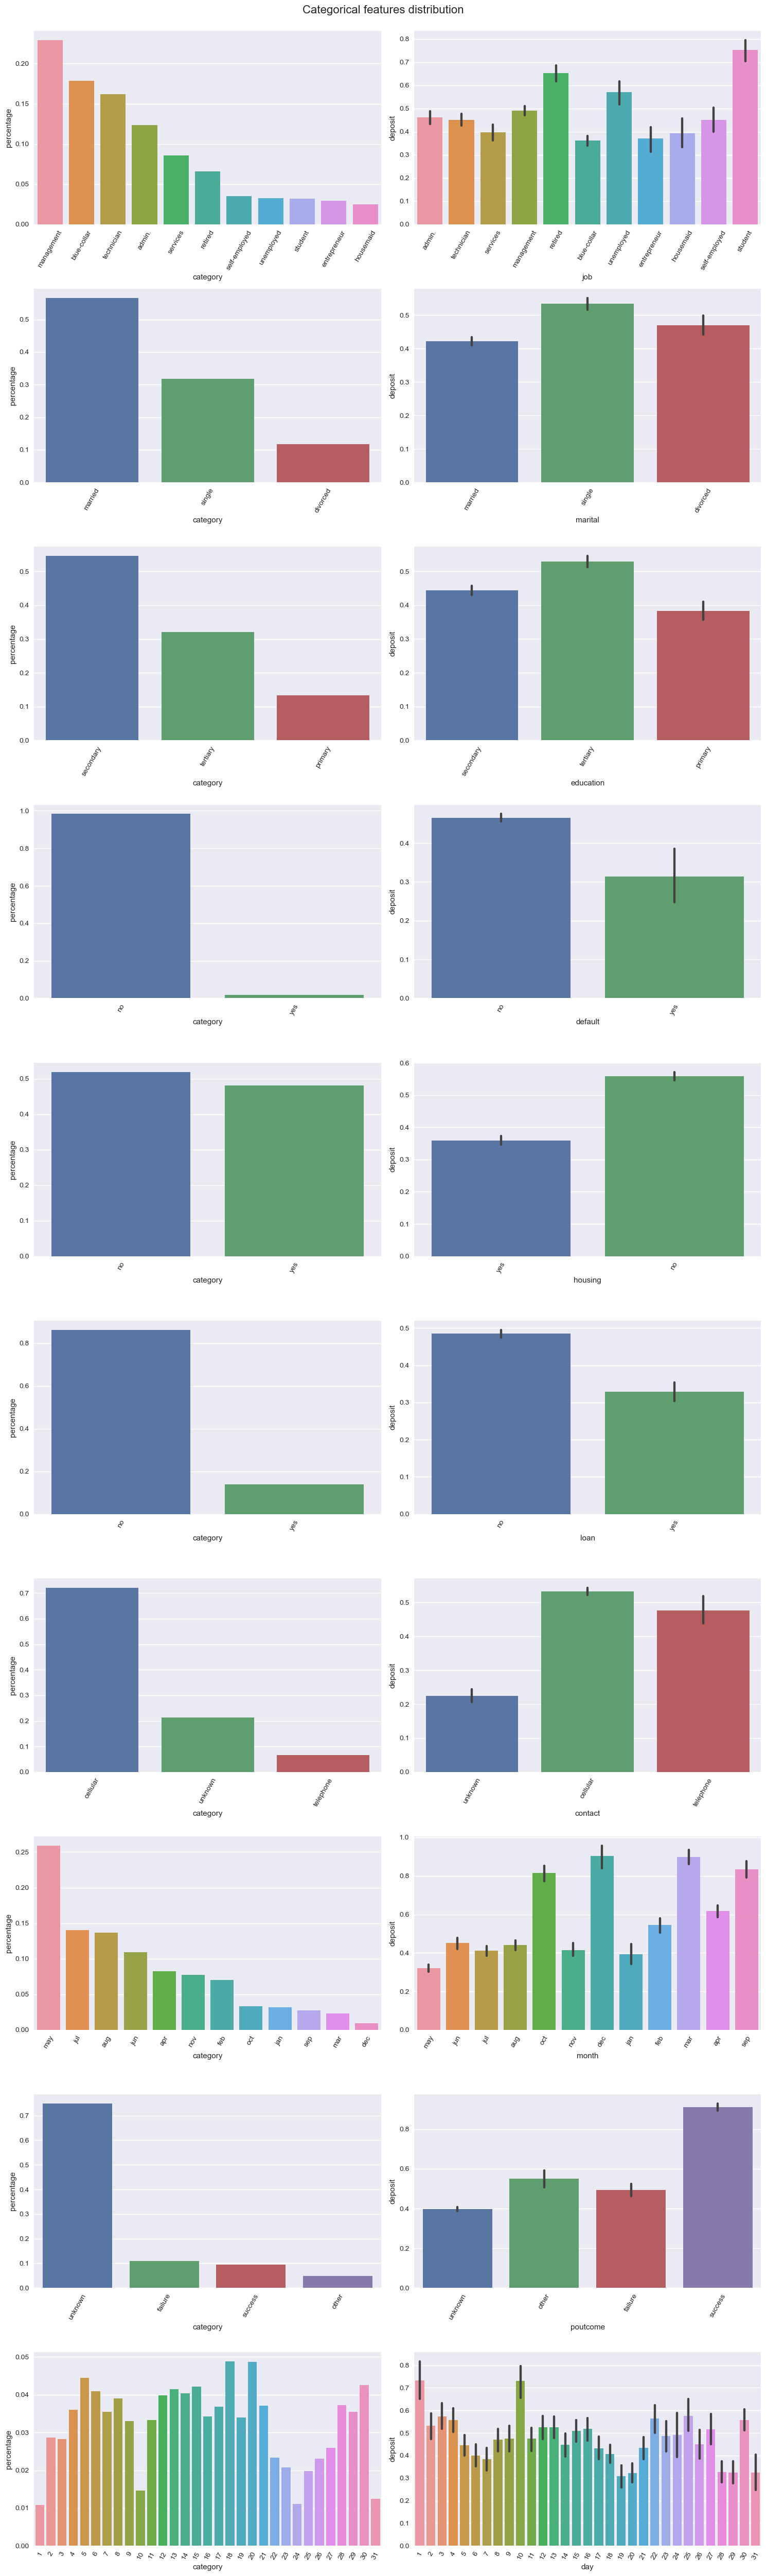

In [26]:
#ваш код
#постройте визуализации, иллюстрирующие результаты

n = len(cat_features) #число категориальных признаков
fig, axes = plt.subplots(n, 2, figsize=(15, n*5)) #фигура+n*2 координатных плоскостей
#Создаем цикл для всех признаков из списка категориальных признаков
for i, feature in enumerate(cat_features):
    #Строим количественную столбчатую для долевого соотношения каждой из категорий в данных
    count_data = (df[feature].value_counts(normalize=True)
                  .sort_values(ascending=False)
                  .rename('percentage')
                  .reset_index().rename({'index':'category'}, axis=1))
    # print(count_data)
    count_barplot = sns.barplot(data=count_data, x='category', y='percentage', ax=axes[i][0])
    count_barplot.xaxis.set_tick_params(rotation=60)
    #Строим столбчатую диаграмму доли людей согласившиеся на предлоэение открыть депозит в зависимости от категории
    mean_barplot = sns.barplot(data=df, x=feature, y='deposit', ax=axes[i][1])
    mean_barplot.xaxis.set_tick_params(rotation=60)
fig.suptitle("Categorical features distribution", fontsize=16, y=1)
plt.tight_layout() #выравнивание графиков

По диаграммаv видно как распределены категории в признаках, а так же видна взаимосвязь с таргетом у всех признаков.

Некоторые признаки, например как уровень образования, имеют очевидную связь с таргетом - чем оно выше, тем с большей вероятностью у людей есть свободные деньги для открытия депозита, или например у предпринимателей обычно деньги вложены в дальнейшее развитие бизнеса, поэтому им не выгодно вкладывать из в депозиты. У неженатых людей как правило меньше расходы, а у пенсионеров (западных) как правило есть приличные накопления, поэтому опять же они достаточно часто соглашались на открытие вклада.

Видна также явная кореляция с месяцем, так как в лето люди тратят как правило больше на отпуска, а вот в декабре получают годовые премии и появляются свободные деньги. 

Удивительным кажется, что 30% из тех, у кого еть просроченные кредиты все таки соглашались на открытие депозита (возникает вопрос откуда свободные деньги!?)

Так же видим, что один из наоболее сильно связанных с успешным оформлением депозита признаком являеетя итог прошлой компании - ~90% людей с успехом в прошлой маркетинговой компании открыли депозит.

Получаем среднестатистического клиента банка - человек семейны со средним образованием, без просрочки по кредитам и самих кредитов, но в 50% случаях с ипотекой, использует для связи приимущественно мобильный телефон.

### Задание 8

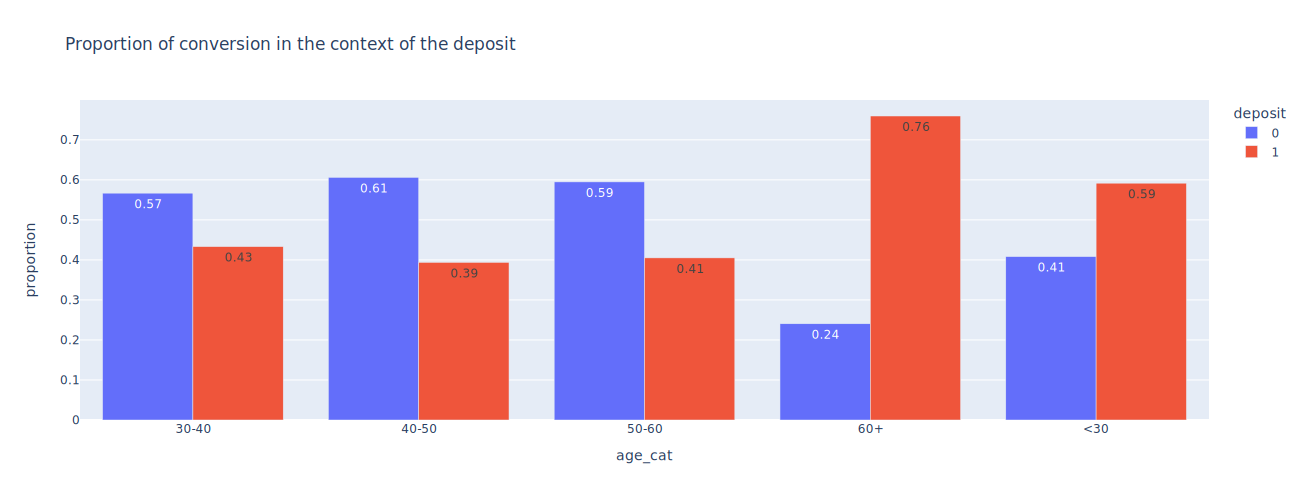

In [27]:
# создайте возрастные группы и определите, в каких группах более склонны открывать депозит, чем отказываться от предложения

def age_categorizator(x):
    age_cat = ['<30', '30-40', '40-50', '50-60', '60+']
    if x > 60:
        return age_cat[4]
    elif x< 20:
        return age_cat[0]
    else:
        return (age_cat[x // 10 - 2])
    
df['age_cat'] = df['age'].apply(age_categorizator)
df.drop(['age'], axis=1, inplace=True)
pivot = df[['age_cat', 'deposit']].groupby(['age_cat'], as_index=False).value_counts(normalize=True)
pivot['deposit'] = pivot['deposit'].astype('category')
fig = px.bar(pivot,
             x='age_cat',
             y='proportion',
             color='deposit',
             barmode='group',
             width=1300,
             text_auto='.2f',
             title='Proportion of conversion in the context of the deposit')
fig.show(PX_MODE)


По диаграмме видно, что две возрастные группы чаще всего открывающие депозит - это 60+ и <30, среди них открыли депозит 76 и 59% соответственно, среди остальных групп доля открывших депозит примерно равно 40%. 

### Задание 11

In [28]:
# постройте сводную таблицу, чтобы определить люди с каким образованием и семейным статусом наиболее многочисленны
#(если рассматривать тех, кто открыл депозит)
cols = ['education', 'marital', 'deposit' ]
for i in range (0,2):
    mask = df['deposit'] == i
    pivot = pd.pivot_table(df[mask], columns='education', index='marital', values='deposit', aggfunc='count')
    fig = px.imshow(
        pivot,
        color_continuous_scale =[(0, "green"), (0.22, "yellow"), (1, "red")],
        title=f'Heatmap education/marital in context deposit={i}',
        width=1000,
        height=500,
        text_auto='.2f',
        )
    fig.show()

Если сравнивать тепловые карты открывших и не открывших вклад на пересечении категорий семейного положения и образования, сильнее всго видно различие в сочетании высшие образование/ одинок - такая комбинация практически в полтора раза чаще встречается у открывших вклад, чем у неоткрывших. Также хоть категория среднее образование / женат встречается наиболее часто у обеих групп, в случая открывших она встречается примерно на 30% реже.

## Часть 3: преобразование данных

### Задание 1

In [29]:
# преобразуйте уровни образования
features = ['education', 'age_cat']
for feature in features:
    encoder = LabelEncoder()
    data_encoded = encoder.fit_transform(df[feature])  #.toarray() if df not Series
    df[feature] = data_encoded
    
display(df[features].head())


,education,age_cat
0,1,2
1,1,2
2,1,1
3,1,2
4,2,2


In [30]:
df['education'].sum()

11995

### Задания 2 и 3

In [31]:
# преобразуйте бинарные переменные в представление из нулей и единиц
df.deposit.describe()

count    10105.000000
mean         0.463236
std          0.498671
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: deposit, dtype: float64

In [32]:
features = ['default', 'housing', 'loan']
for feature in features:
    df[feature] = df[feature].apply(lambda x: 1 if x == 'yes' else 0)
df[features].head()

,default,housing,loan
0,0,1,0
1,0,0,0
2,0,1,0
3,0,1,0
4,0,0,0


In [33]:
np.sum(df[features].mean())

0.6354280059376547

### Задание 4

In [34]:
# создайте дамми-переменные
features = ['job', 'marital', 'contact', 'month', 'poutcome']
one_hot_encoder = OneHotEncoder()
data_one_hot = one_hot_encoder.fit_transform(df[features]).toarray()
cols = one_hot_encoder.get_feature_names_out()
data_one_hot = pd.DataFrame(data_one_hot, index=df.index, columns=cols)
df_copy = df.copy()
df = pd.concat([df,data_one_hot], axis=1)
df.head()

,job,marital,education,default,balance,housing,loan,contact,day,month,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,admin.,married,1,0,2343.0,1,0,unknown,5,may,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,admin.,married,1,0,45.0,0,0,unknown,5,may,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,technician,married,1,0,1270.0,1,0,unknown,5,may,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,services,married,1,0,2476.0,1,0,unknown,5,may,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,admin.,married,2,0,184.0,0,0,unknown,5,may,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Задания 5 и 6

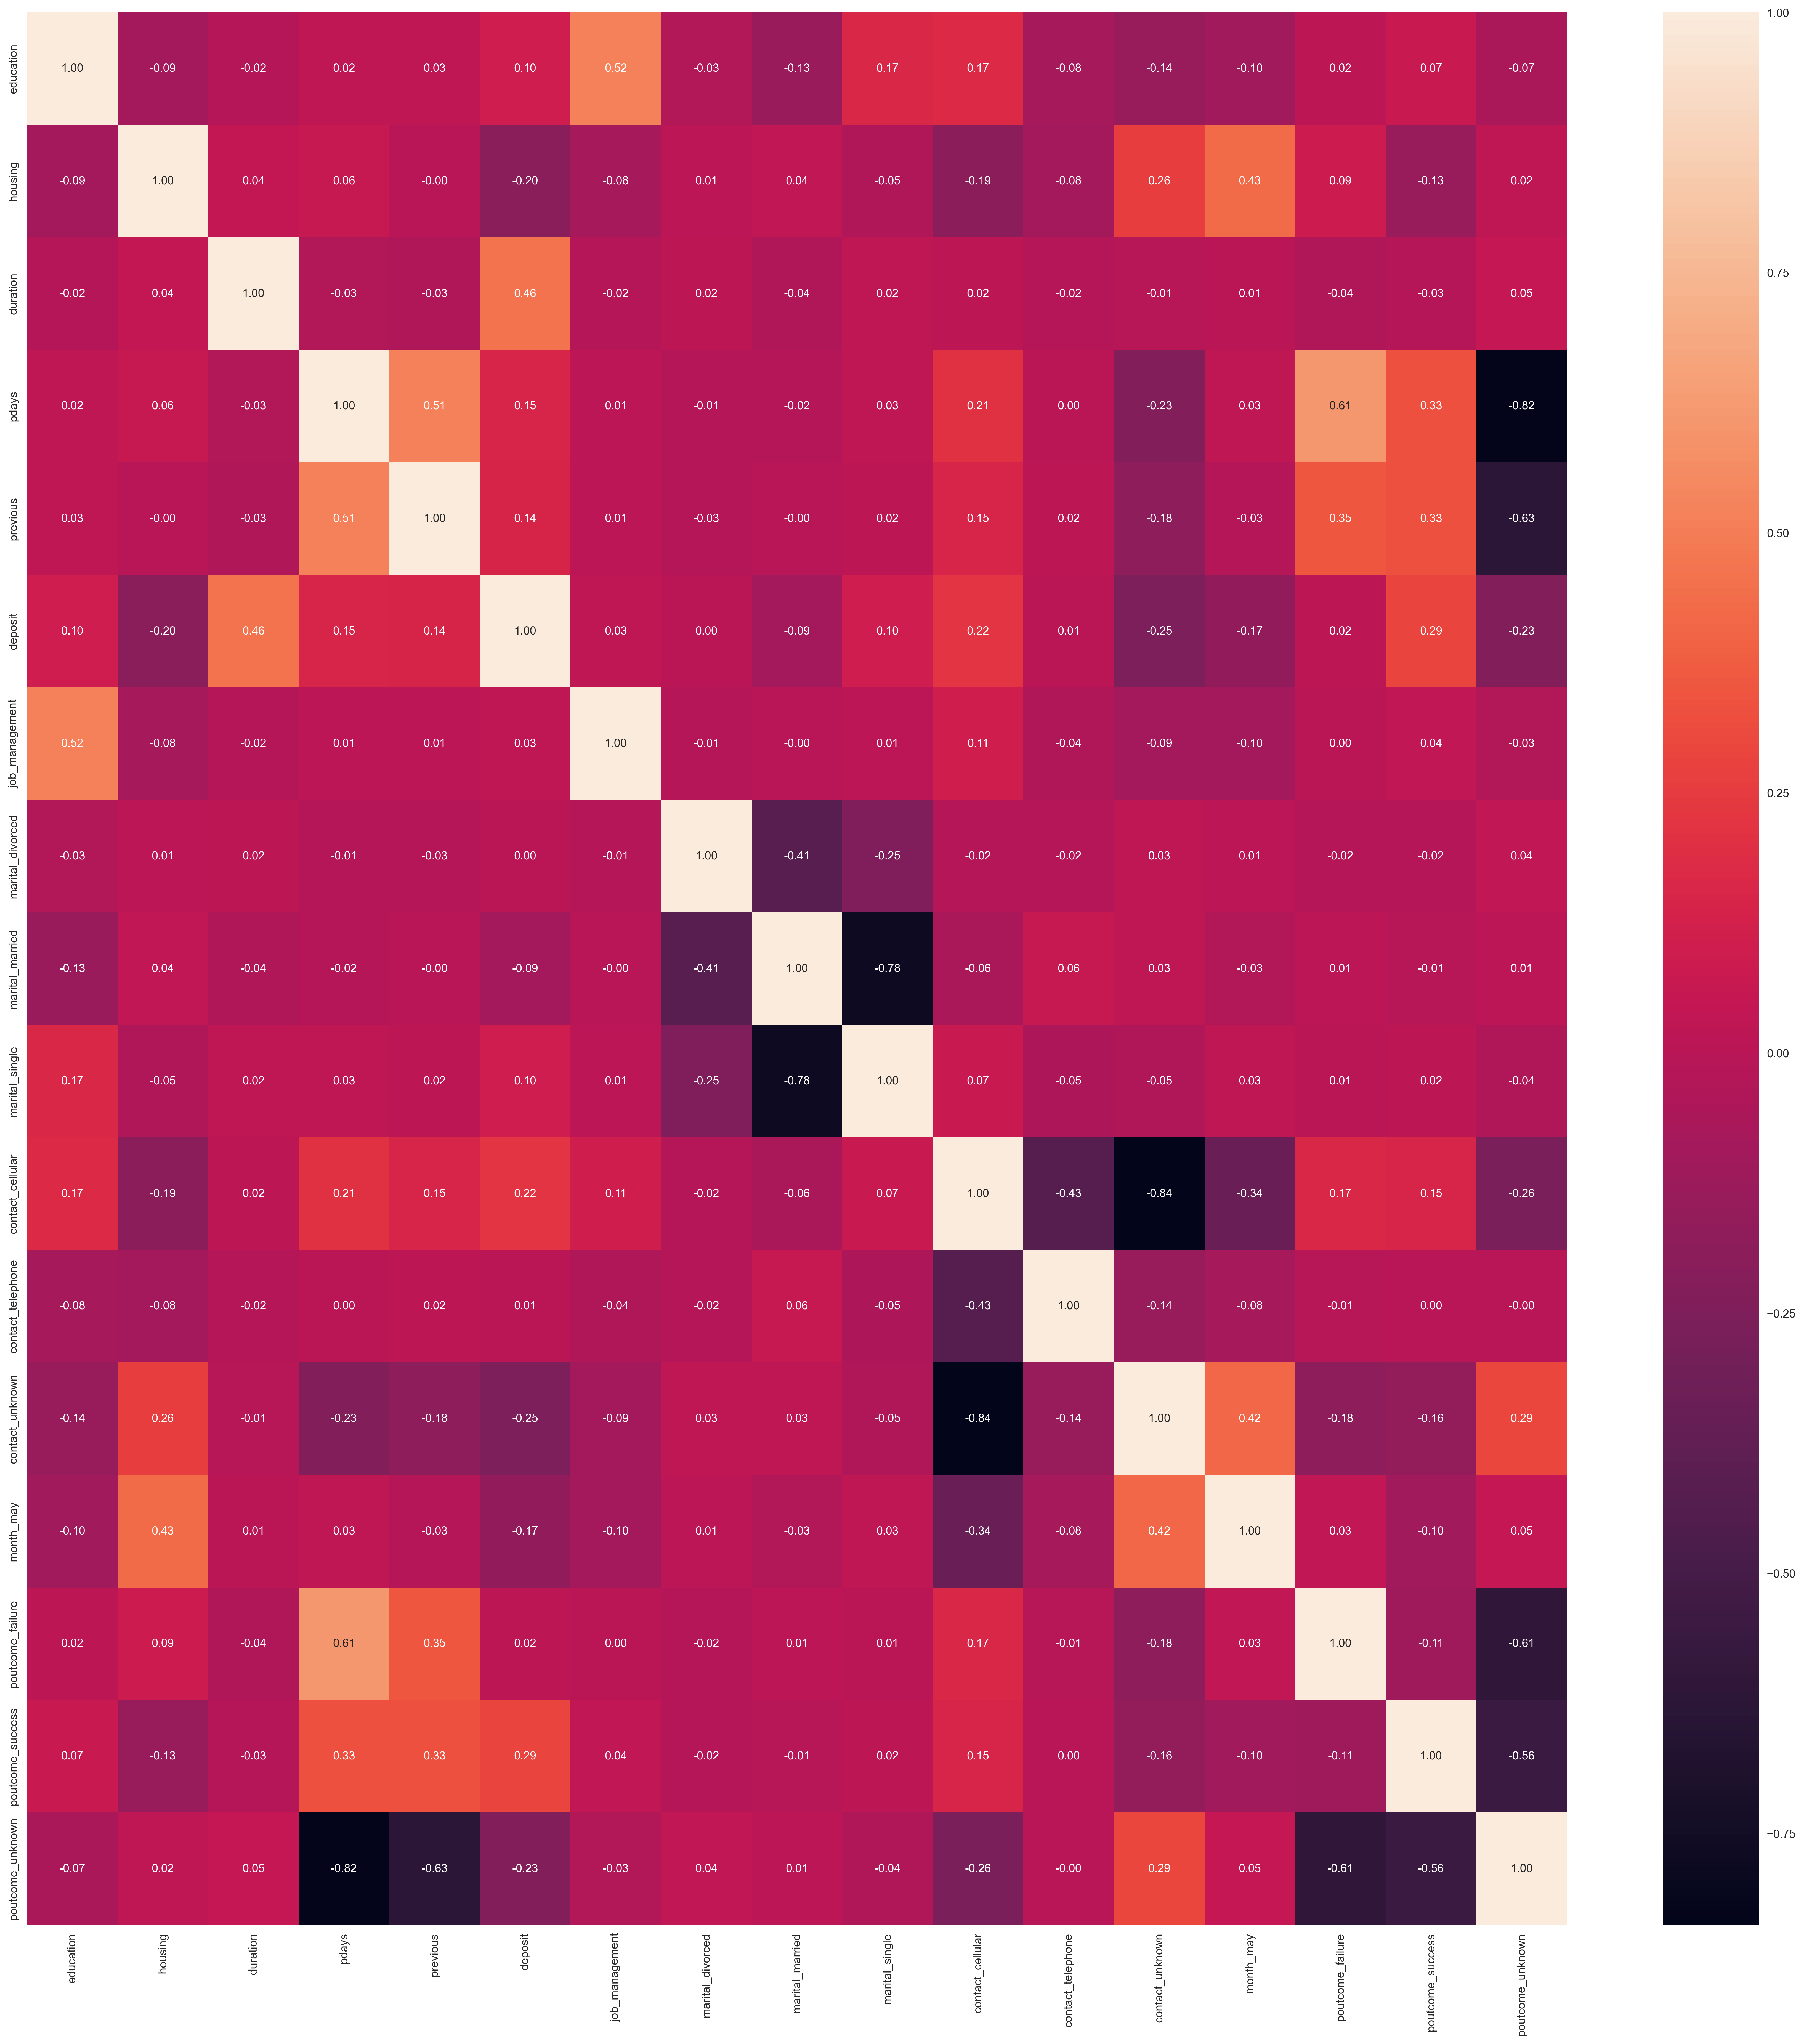

In [35]:
# постройте корреляционную матрицу и оцените данные на предмет наличия мультиколлинеарности
# так как признаков много, будем рассматривать признаки, где есть корреляция >0.4 по модулю

df_corr = df.corr()
result_columns = []
for column in df_corr:
    col_data = df_corr[column]
    if col_data.min() < -0.4 or col_data.sort_values(ascending=False)[1] > 0.4:
        result_columns.append(column)
# result_columns.append('') 
fig, (axes) = plt.subplots(ncols=1, figsize=(30,30), dpi = 300)
sns.heatmap(df[result_columns].corr(), annot=True, fmt='.2f', ax=axes);
fig.savefig(format('svg.svg'))


### Задания 7 и 8

In [36]:
object_columns = [s for s in df.columns if df[s].dtypes == 'object']
df.drop(object_columns, axis = 1, inplace=True)

X = df.drop(['deposit'], axis=1)
y = df['deposit']
 
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 42, test_size = 0.33)

In [37]:
# рассчитайте необходимые показатели
print(f'   train    |     test\n {"-"*25}')
X_train.shape, X_test.shape

   train    |     test
 -------------------------


((6770, 44), (3335, 44))

In [38]:
y_test.mean()

0.46326836581709147

### Задание 9

In [39]:
# с помощью SelectKBest отберите 15 наиболее подходящих признаков
selector = SelectKBest(score_func=f_classif, k=15)
selector.fit(X_train, y_train)
selected_features = selector.get_feature_names_out()
selected_features

array(['balance', 'housing', 'duration', 'campaign', 'pdays', 'previous',
       'age_cat', 'contact_cellular', 'contact_unknown', 'month_mar',
       'month_may', 'month_oct', 'month_sep', 'poutcome_success',
       'poutcome_unknown'], dtype=object)

In [40]:
X_train, X_test = X_train[selected_features], X_test[selected_features],

### Задание 10

In [41]:
# нормализуйте данные с помощью minmaxsxaler
scaler=preprocessing.MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_test[:,0].mean()

0.46823674223097866

# Часть 4: Решение задачи классификации: логистическая регрессия и решающие деревья

### Задание 1

In [42]:
# обучите логистическую регрессию и рассчитайте метрики качества
log_reg = linear_model.LogisticRegression(solver='sag', random_state=42, max_iter=1000)
log_reg.fit(X_train, y_train)
y_train_pred_logreg = log_reg.predict(X_train)
y_test_pred_logreg = log_reg.predict(X_test)
metrics.accuracy_score(y_test, y_test_pred_logreg)

0.8047976011994002

### Задания 2,3,4

In [43]:
# обучите решающие деревья, настройте максимальную глубину
des_tree = tree.DecisionTreeClassifier(criterion='entropy', random_state=42)
des_tree.fit(X_train, y_train)
y_train_pred_dtree = des_tree.predict(X_train)
y_test_pred_dtree = des_tree.predict(X_test)
print(f'   train    |     test\n {"-"*25}')
metrics.accuracy_score(y_train, y_train_pred_dtree), metrics.accuracy_score(y_test, y_test_pred_dtree)

   train    |     test
 -------------------------


(1.0, 0.7472263868065967)

Переберите различные максимальные глубины деревьев и найдите глубину дерева, для которой будет максимальное значение метрики accuracy, но при этом ещё не будет наблюдаться переобучения (т. е. не будет расти качество на обучающей выборке при неизменном качестве на тестовой).

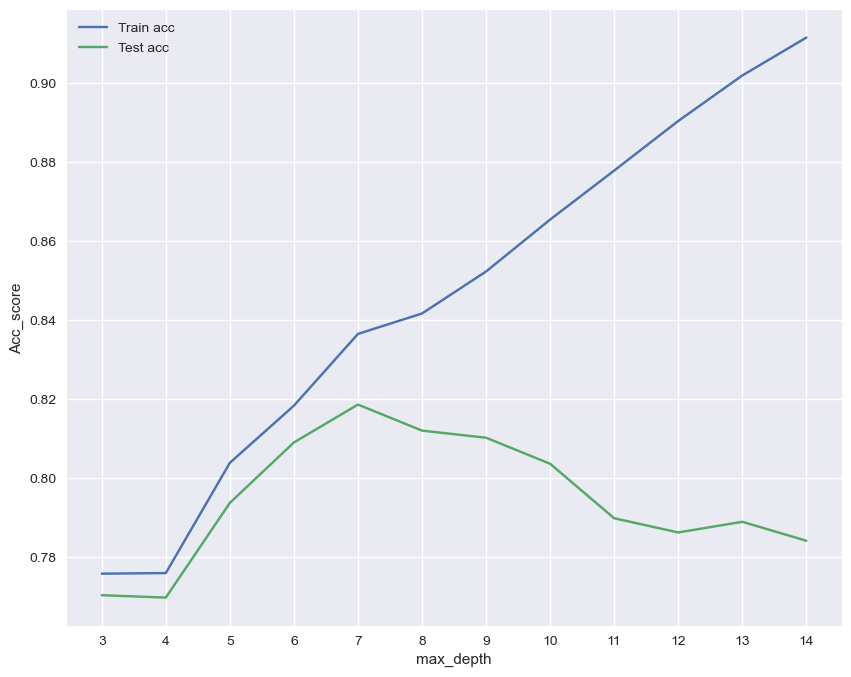

In [44]:
train_ac, test_ac = [], []
depth_range = range(3,15)
for i in depth_range:
    des_tree = tree.DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=i)
    des_tree.fit(X_train, y_train)
    y_train_pred_dtree_n = des_tree.predict(X_train)
    y_test_pred_dtree_n = des_tree.predict(X_test)
    train_ac.append(metrics.accuracy_score(y_train, y_train_pred_dtree_n))
    test_ac.append(metrics.accuracy_score(y_test, y_test_pred_dtree_n))

fig, ax = plt.subplots(figsize=(10,8))
ax.plot(depth_range, train_ac, label='Train acc')
ax.plot(depth_range, test_ac, label='Test acc')
ax.set_xticks(depth_range)
# ax.xaxis.set_tick_params(rotation=45)
ax.set_ylabel('Acc_score')
ax.set_xlabel('max_depth')
ax.legend()

In [45]:
test_ac[4]

0.8185907046476761

### Задание 5

In [46]:
# подберите оптимальные параметры с помощью gridsearch
param_grid = {'min_samples_split': [2, 5, 7, 10],
          'max_depth':[3,5,7]}
grid_search = GridSearchCV(
    estimator=tree.DecisionTreeClassifier(criterion='entropy', random_state=42),
    param_grid=param_grid,
    scoring='f1'
)

grid_search.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=42),
             param_grid={'max_depth': [3, 5, 7],
                         'min_samples_split': [2, 5, 7, 10]},
             scoring='f1')

In [47]:
print('f1_score на тестовом наборе: {:.3f}'.format(grid_search.score(X_test, y_test)))
print(f'Наилучшие значения гиперпараметров:{grid_search.best_params_}')

f1_score на тестовом наборе: 0.805
Наилучшие значения гиперпараметров:{'max_depth': 7, 'min_samples_split': 10}


# Часть 5: Решение задачи классификации: ансамбли моделей и построение прогноза

### Задание 1

In [48]:
# обучите на ваших данных случайный лес
rforest = RandomForestClassifier(n_estimators=100,
                                 criterion='gini',
                                 min_samples_leaf=5,
                                 max_depth=10,
                                 random_state=42)
rforest.fit(X_train, y_train)
y_train_pred_rforest = rforest.predict(X_train)
y_test_pred_rforest = rforest.predict(X_test)
print(metrics.classification_report(y_test, y_test_pred_rforest))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      1790
           1       0.80      0.83      0.82      1545

    accuracy                           0.83      3335
   macro avg       0.83      0.83      0.83      3335
weighted avg       0.83      0.83      0.83      3335



### Задания 2 и 3

In [49]:
# используйте для классификации градиентный бустинг и сравните качество со случайным лесом
gb = GradientBoostingClassifier(
    learning_rate=0.05,
    min_samples_leaf=5,
    max_depth=5, #максимальная глубина дерева
    n_estimators=300, #количество деревьев в ансамбле
    random_state=42 #датчик генератора случайных чисел
)
gb.fit(X_train, y_train)
y_train_pred_gb = gb.predict(X_train)
y_test_pred_gb = gb.predict(X_test)
print(metrics.classification_report(y_test, y_test_pred_gb))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      1790
           1       0.80      0.83      0.82      1545

    accuracy                           0.83      3335
   macro avg       0.83      0.83      0.83      3335
weighted avg       0.83      0.83      0.83      3335



### Задание 4

In [50]:
# объедините уже известные вам алгоритмы с помощью стекинга 
estimators = [
    # ('lr', linear_model.LogisticRegression(solver='sag', random_state=42, max_iter=1000)),
    ('dt', tree.DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=7)),
    ('gb',  GradientBoostingClassifier(
    learning_rate=0.05,
    min_samples_leaf=5,
    max_depth=5, #максимальная глубина дерева
    n_estimators=300, #количество деревьев в ансамбле
    random_state=42 #датчик генератора случайных чисел
))
]

# Создаем объект класса стекинг
stack = StackingClassifier(
    estimators=estimators,
    final_estimator=linear_model.LogisticRegression(solver='sag', random_state=42, max_iter=1000)
)

stack.fit(X_train, y_train)
y_train_pred_st = stack.predict(X_train)
y_test_pred_st = stack.predict(X_test)
print(metrics.classification_report(y_test, y_test_pred_st))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1790
           1       0.81      0.82      0.81      1545

    accuracy                           0.83      3335
   macro avg       0.83      0.83      0.83      3335
weighted avg       0.83      0.83      0.83      3335



### Задание 5

In [51]:
# оцените, какие признаки демонстрируют наибольшую  важность в модели градиентного бустинга
dff = pd.Series(gb.feature_importances_, index= selected_features).sort_values(ascending=False)
dff

duration            0.501987
poutcome_success    0.116264
contact_unknown     0.073762
balance             0.059764
pdays               0.055700
housing             0.046583
age_cat             0.042108
month_mar           0.026144
month_oct           0.018824
campaign            0.017095
month_may           0.014508
month_sep           0.013428
previous            0.008879
contact_cellular    0.004600
poutcome_unknown    0.000355
dtype: float64

### Задания 6,7,8

In [52]:
# реализуйте оптимизацию гиперпараметров с помощью Optuna
def optuna_rf(trial):

  n_estimators = trial.suggest_int('n_estimators', 100, 200, 1)
  max_depth = trial.suggest_int('max_depth', 10, 30, 1)
  min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 10, 1)              


  # создаем модель
  model = RandomForestClassifier(
                                 n_estimators=n_estimators,
                                 criterion='gini',
                                 min_samples_leaf=min_samples_leaf,
                                 max_depth=max_depth,
                                 random_state=42)
  # обучаем модель
  cv =StratifiedKFold(n_splits=5)
  score = cross_val_score(model, X, y, cv=cv, scoring="f1", n_jobs=-1).mean()

  return score



In [53]:
# cоздаем объект исследования
# можем напрямую указать, что нам необходимо максимизировать метрику direction="maximize"
study = optuna.create_study(study_name="RForest", direction="maximize")
# ищем лучшую комбинацию гиперпараметров n_trials раз
study.optimize(optuna_rf, n_trials=50)

[I 2023-07-17 19:59:44,572] A new study created in memory with name: RForest
[I 2023-07-17 19:59:46,414] Trial 0 finished with value: 0.761115468083312 and parameters: {'n_estimators': 152, 'max_depth': 18, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.761115468083312.
[I 2023-07-17 19:59:47,580] Trial 1 finished with value: 0.7680424622616202 and parameters: {'n_estimators': 112, 'max_depth': 28, 'min_samples_leaf': 4}. Best is trial 1 with value: 0.7680424622616202.
[I 2023-07-17 19:59:48,710] Trial 2 finished with value: 0.7526325884621247 and parameters: {'n_estimators': 113, 'max_depth': 23, 'min_samples_leaf': 7}. Best is trial 1 with value: 0.7680424622616202.
[I 2023-07-17 19:59:49,817] Trial 3 finished with value: 0.7767786979907563 and parameters: {'n_estimators': 102, 'max_depth': 27, 'min_samples_leaf': 3}. Best is trial 3 with value: 0.7767786979907563.
[I 2023-07-17 19:59:50,478] Trial 4 finished with value: 0.7429280983247653 and parameters: {'n_estimators': 134,

In [54]:
model = RandomForestClassifier(**study.best_params, random_state=42)
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
print('f1_score на тестовом наборе: {:.3f}'.format(metrics.f1_score(y_test, y_test_pred)))
print('acc_score на тестовом наборе: {:.3f}'.format(metrics.accuracy_score(y_test, y_test_pred)))
print("Наилучшие значения гиперпараметров {}".format(study.best_params))


f1_score на тестовом наборе: 0.816
acc_score на тестовом наборе: 0.825
Наилучшие значения гиперпараметров {'n_estimators': 144, 'max_depth': 23, 'min_samples_leaf': 2}
